### 학습목표
- 시각화 패키지 matplotlib
- 서브 패키지 pyplot
- 고급 시각화 패키지 seaborn
- 분석된 내용을 시각화
- 지도 시각화 패키지 folium

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

### plot 유형
- line
- area
- surface
- bar
- hist
- box etc...

In [47]:
data = []
for i in range(10):
    data.append(i)

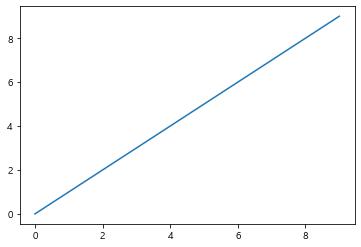

In [48]:
plt.figure() # 사이즈 설정
plt.plot(data) # x축 인덱스, y축 데이터
plt.show()
plt.close()

### line plot

file read option
- path
- sep (구분자)
- header
- skiprows
- encoding
- fillna

ex ) cityDF = pd.read_excel('./data/시도별 전출입 인구수.xlsx', header=0).fillna(0)

In [49]:
cityDF = pd.read_excel('./data/시도별 전출입 인구수.xlsx', header=0)

In [50]:
cityDF.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [51]:
cityDF = cityDF.fillna(method='ffill') # 누락된 값 앞에 있는 것으로 채우기|

In [52]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 서브셋을 만든다면?

mask = (cityDF['전출지별'] == '서울특별시') & (cityDF['전입지별'] != '서울특별시')
seoulDF = cityDF[mask]

In [53]:
seoulDF = seoulDF.drop(['전출지별'], axis=1)

In [54]:
seoulDF

,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,대전광역시,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,울산광역시,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,세종특별자치시,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
28,경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [57]:
# 원하는 열 인덱스를 다른 이름으로 변경
seoulDF.rename({'전입지별' : '전입지'}, axis = 1, inplace=True)
seoulDF

,전입지,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,대전광역시,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,울산광역시,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,세종특별자치시,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
28,경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [58]:
seoulDF.set_index('전입지', inplace=True) # 전입지를 index로 설정하기
seoulDF

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


In [63]:
# 경기도로 이동한 인구 데이터 값만 선택해서 시각화?
# 라벨인덱싱을 했으니까 loc로 찾을 수 있다.
datas = seoulDF.loc['경기도'] # type 은 Series , Series는 index와 value로만 이루어진 거니까.
print(datas.index)
print(datas.values)

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')
[130149 150313 93333 143234 149045 253705 202276 207722 237684 278411
 297539 252073 320174 400875 352238 390265 412535 405220 415174 412933
 473889 384714 428344 502584 542204 599411 520566 495454 407050 471841
 435573 499575 516765 457656 400206 414621 449632 431637 412408 398282
 410735 373771 354135 340801 332785 359337 370760 342433]


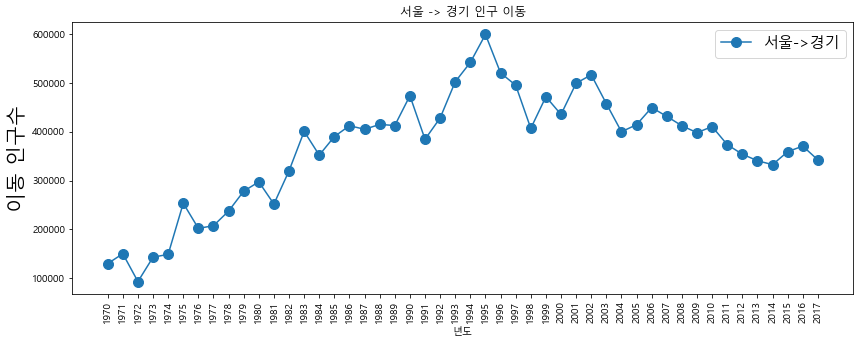

In [77]:
# 따라서 line plot을 그려볼 수 있겠다.

plt.figure(figsize = (14, 5))

plt.plot(datas.index, datas.values, marker='o', markersize = 10)


plt.title('서울 -> 경기 인구 이동')
plt.xlabel('년도')
plt.ylabel('이동 인구수', size=20)
plt.xticks(size=10, rotation = 'vertical')



plt.legend(labels=['서울->경기'], loc='best', fontsize=15)

plt.show()
plt.close()

<ipython-input-92-99dd0dcd3787>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax02.set_xticklabels(datas.index, rotation=75)


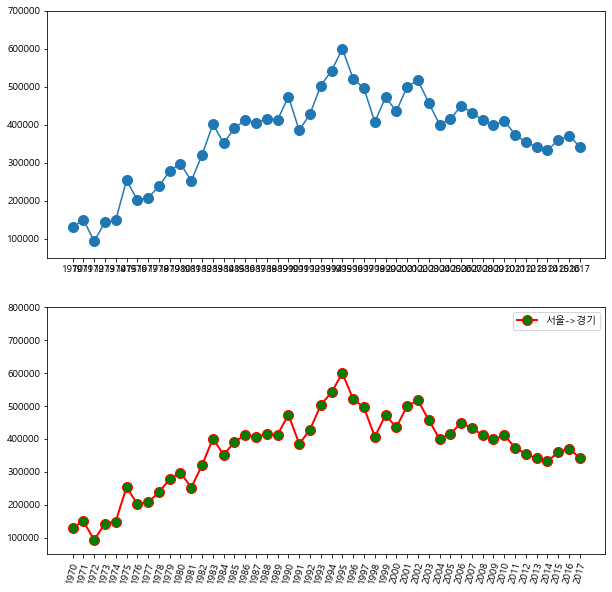

In [92]:
fig = plt.figure(figsize = (10,10))
ax01 = fig.add_subplot(2, 1, 1)
ax02 = fig.add_subplot(2, 1, 2)

# marker = o, +, *

ax01.plot(datas, marker='o', markersize=10)
ax02.plot(datas, marker='o', markersize=10, color='red', linewidth=2, label='서울->경기', markerfacecolor='green')
ax02.legend(loc='best')

# y축 범위지정
ax01.set_ylim(50000, 700000)
ax02.set_ylim(50000, 800000)

ax02.set_xticklabels(datas.index, rotation=75)

plt.show()
plt.close()

In [122]:
#서울에서 충청남도, 경상북도, 강원도 이동한 인구 데이터 값만 선택
seoulDF.loc[['충청남도', '경상북도', '강원도'], :]

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


### map 함수 사용법

In [114]:
a = [1.2, 2.5, 3.7]
for i in range(len(a)) :
    a[i] = int(a[i])
a

[1, 2, 3]

In [115]:
a = [1.2, 2.5, 3.7]
a = list(map(int, a))
a

[1, 2, 3]

In [121]:
col_years = list(map(str, range(1970, 2018)))
col_years

dataDF = seoulDF.loc[['충청남도', '경상북도', '강원도'], col_years] 

<ipython-input-135-b191284e8ebe>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(datas.index, rotation=75)


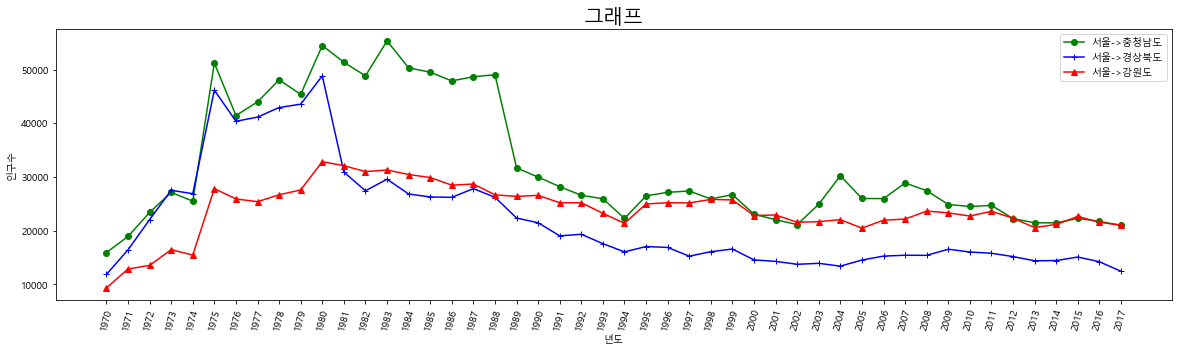

In [135]:
fig = plt.figure(figsize=(20, 5))
ax  = fig.add_subplot(1,1,1)

ax.plot(col_years, dataDF.loc['충청남도', :], marker='o', color='green', label='서울->충청남도')
ax.plot(col_years, dataDF.loc['경상북도', :], marker='+', color='blue', label='서울->경상북도')
ax.plot(col_years, dataDF.loc['강원도', :], marker='^', color='red', label='서울->강원도')

ax.set_xticklabels(datas.index, rotation=75)

ax.set_title('그래프', size =20)
ax.set_xlabel('년도')
ax.set_ylabel('인구수')

ax.legend(loc='best')
plt.show()
plt.close()

In [138]:
colors = {}
for name, hex in matplotlib.colors.cnames.items():
    colors[name] = hex
colors

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

### bar plot

In [139]:
Y = [2, 3, 1]
Y

[2, 3, 1]

In [140]:
X = np.arange(len(Y))
X

array([0, 1, 2])

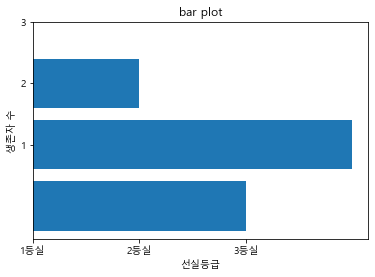

In [150]:
xlabel = ['1등실', '2등실', '3등실']
plt.figure()
# plt.bar(X, Y)
plt.barh(X,Y)

plt.title('bar plot')
plt.xlabel('선실등급')
plt.ylabel('생존자 수')

# 원하는 라벨로 바꾸기
plt.xticks(X, xlabel)
plt.yticks(Y)

plt.show()
plt.close()

In [197]:
# 서울에서 충청남도, 경상북도, 강원도, 전라남도로 이동한 인구 데이터의 프레임을 만들자
# 조건 2010 ~ 2017
col_years = list(map(str, range(2010, 2018)))
dataDF = seoulDF.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]

In [198]:
dataDF.index

Index(['충청남도', '경상북도', '강원도', '전라남도'], dtype='object', name='전입지')

In [199]:
dataDF.values

array([[24522, 24723, 22269, 21486, 21473, 22299, 21741, 21020],
       [16042, 15818, 15191, 14420, 14456, 15113, 14236, 12464],
       [22736, 23624, 22332, 20601, 21173, 22659, 21590, 21016],
       [16429, 15974, 14765, 14187, 14591, 14598, 13065, 12426]],
      dtype=object)

In [200]:
dataDF = dataDF.transpose()
dataDF.index # 문자열을 map을 통해 형 변환
dataDF.index = dataDF.index.map(int)

In [201]:
dataDF.index

Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype='int64')

<Figure size 432x288 with 0 Axes>

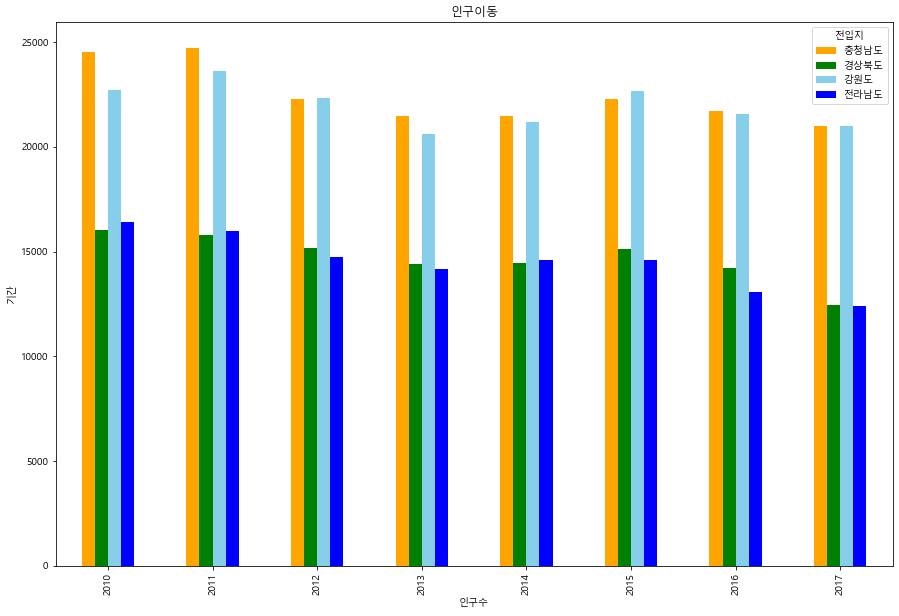

In [202]:
plt.figure()
dataDF.plot(kind='bar', 
            figsize = (15, 10),
            color= ['orange', 'green', 'skyblue', 'blue'])

plt.title('인구이동')
plt.xlabel('인구수')
plt.ylabel('기간')

plt.show()
plt.close()

In [203]:
# 2010-2017년 이동 인구 수를 합계하여 새로운 열(합계)을 추가하여
# 가장 큰 값으로 정렬하고
# 수평 막대 그래프를 시각화한다면?

In [204]:
dataDF = dataDF.T

In [205]:
dataDF['합계'] = dataDF.sum(axis=1)

In [215]:
sumDF = dataDF[['합계']].sort_values(by='합계', ascending=False)

In [218]:
sumDF

,합계
전입지,
충청남도,179533.0
강원도,175731.0
경상북도,117740.0
전라남도,116035.0


<Figure size 432x288 with 0 Axes>

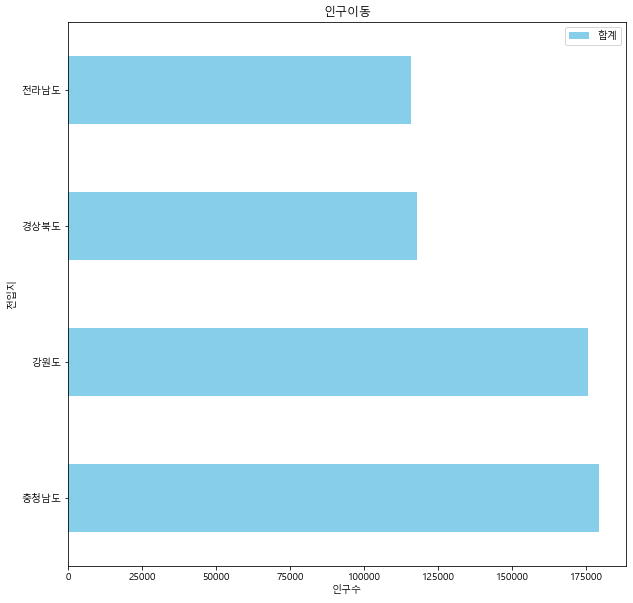

In [220]:
plt.figure()
sumDF.plot(kind='barh', 
            figsize = (10, 10),
            color= 'skyblue')

plt.title('인구이동')
plt.xlabel('인구수')
plt.ylabel('전입지')

plt.show()
plt.close()


In [221]:
import seaborn as sns

In [223]:
iris_dataset = sns.load_dataset('iris')
iris_dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [224]:
iris_dataset.index

RangeIndex(start=0, stop=150, step=1)

In [225]:
iris_dataset.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [226]:
iris_dataset['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [230]:
# 칼럼의 이름을 바꾸고 싶다? -> rename

iris_dataset.rename(columns = {iris_dataset.columns[0] : 'SL',
                               iris_dataset.columns[1] : 'SW',
                               iris_dataset.columns[2] : 'PL',
                               iris_dataset.columns[3] : 'PW',
                               iris_dataset.columns[4] : 'Y'}, inplace = True)

In [233]:
iris_dataset[['SL', 'SW']][:5]

,SL,SW
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [235]:
# 종을 기준으로 그룹화하여 각 그룹의 평균을 구해 본다면?

iris_mean_df = iris_dataset.groupby('Y').mean()

In [236]:
iris_mean_df.index

Index(['setosa', 'versicolor', 'virginica'], dtype='object', name='Y')

In [237]:
iris_mean_df.T

Y,setosa,versicolor,virginica
SL,5.006,5.936,6.588
SW,3.428,2.770,2.974
PL,1.462,4.260,5.552
PW,0.246,1.326,2.026


<Figure size 432x288 with 0 Axes>

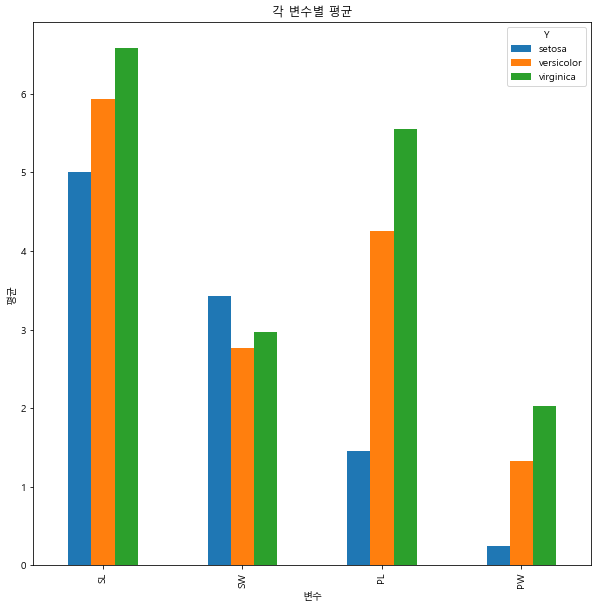

In [239]:
plt.figure()
iris_mean_df.T.plot(kind='bar', 
                    figsize = (10, 10),
                    )

plt.title('각 변수별 평균')
plt.xlabel('변수')
plt.ylabel('평균')

plt.show()
plt.close()


<Figure size 432x288 with 0 Axes>

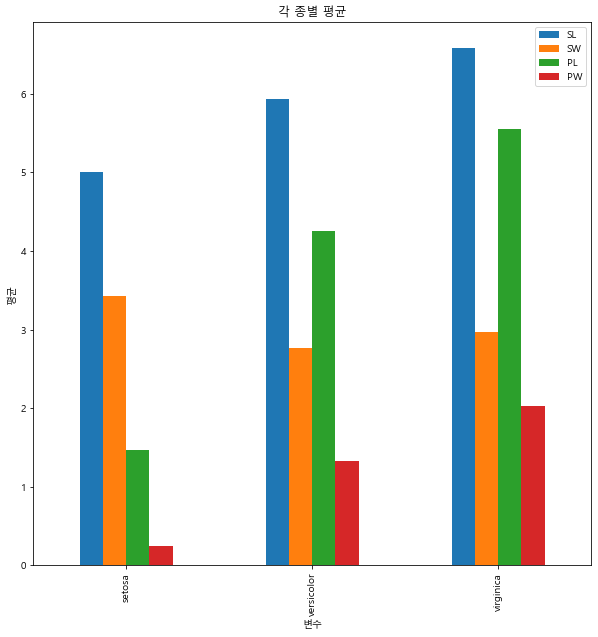

In [241]:
plt.figure()
iris_mean_df.plot(kind='bar', 
                    figsize = (10, 10),
                    )

plt.title('각 종별 평균')
plt.xlabel('변수')
plt.ylabel('평균')

plt.show()
plt.close()


### box plot

In [247]:
boxDF= iris_dataset[['SL', 'Y']]
boxDF

,SL,Y
0,5.1,setosa
1,4.9,setosa
2,4.7,setosa
3,4.6,setosa
4,5.0,setosa
...,...,...
145,6.7,virginica
146,6.3,virginica
147,6.5,virginica
148,6.2,virginica


<Figure size 432x288 with 0 Axes>

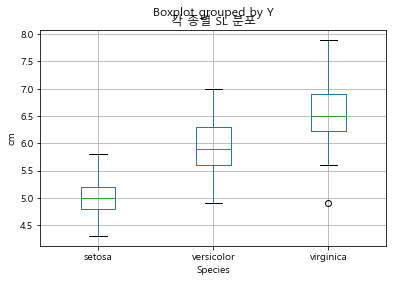

In [248]:
# 종별 SL에 대한 분포를 확인하고 싶다면?

plt.figure()

boxDF.boxplot(by='Y')

plt.title('각 종별 SL 분포')
plt.xlabel('Species')
plt.ylabel('cm')

plt.show()
plt.close()
